# *Art from code* - companion Matplotlib notebooks 

This is a companion notebook to [Danielle Navarro's R tutorial "Art from Code"](https://art-from-code.netlify.app/), which took place during RConf2022. 

Python code by [Teresa Kubacka](http://teresa-kubacka.com/)

## Session 1: Get Started

### Mpg visualization

Here we learn: 
- making bubbles with mpl 
- working with polar projections 

In [28]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline

Let's grab the same data: 

In [9]:
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv'
df = pd.read_csv(url)

df.head()

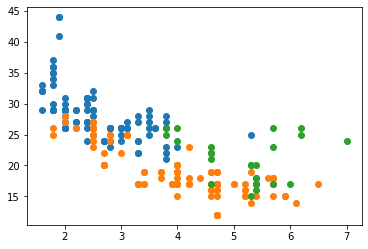

In [18]:
f, ax = plt.subplots()

style = {'lw': 0, 'marker': 'o'}

for c in df['drv'].unique():
    df_tmp = df.query('drv == @c')
    ax.plot(df_tmp['displ'], df_tmp['hwy'], **style)
    

Getting rid of the axes and scaling the sizes: 

(1.33, 7.27, 10.4, 45.6)

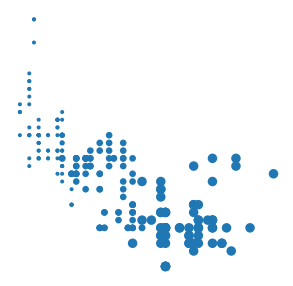

In [46]:
f, ax = plt.subplots(figsize=(5,5))

style = {'linewidths': 0, 'marker': 'o'}

size_transform = lambda x: (x**2.5)*0.5

df_tmp = df
ax.scatter(
    df_tmp['displ'], df_tmp['hwy'], 
    **style, 
    s=df_tmp['cyl'].apply(size_transform),
    )

ax.axis('off')  # get rid of the axes 

We have to create a new column mapping our `drv` labels to numericals. We will use categories for this: 

In [51]:
df['drv_cat'] = df['drv'].astype('category').cat.codes

For coloring the markers, we can use the `cmap` and `norm` properties right away: 

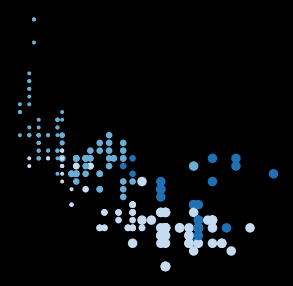

In [155]:
f, ax = plt.subplots(figsize=(5,5))

style = {'linewidths': 0, 'marker': 'o'} # some marker style props 

size_transform = lambda x: (x**2.5)*0.5 # scale the size so that it varies more drastically 

df_tmp = df
ax.scatter(
    df_tmp['displ'], df_tmp['hwy'], 
    **style, 
    s=df_tmp['cyl'].apply(size_transform),
    c=df['drv'].astype('category').cat.codes, # color as a number 
    cmap='Blues', norm = mpl.colors.Normalize(vmin=-1, vmax=3) # choose and scale the colormap mapping to have nice colors 

    )

ax.axis('off')  # get rid of the axes 
f.patch.set_facecolor('black') # create black bg - here we removed the axes, so we set facecolor of the figure directly

However to work with `edgecolors`, we need to produce the mapping explicitly: 

In [74]:
n_min = df['drv_cat'].min()
n_max = df['drv_cat'].max()
cmap = mpl.cm.Blues
norm = mpl.colors.Normalize(vmin=n_min-1, vmax=n_max+1)
color_transform = lambda x: cmap(norm(x))

Now we can continue plotting: 

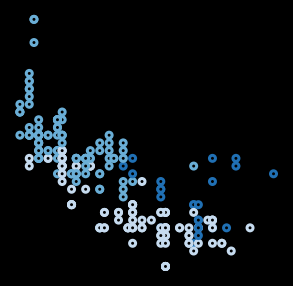

In [116]:
f, ax = plt.subplots(figsize=(5,5))

style = {'linewidths': 3, 'marker': 'o', } # some marker style props 

size_transform = lambda x: (x**2.5)*0.5 # scale the size so that it varies more drastically 

df_tmp = df
ax.scatter(
    df_tmp['displ'], df_tmp['hwy'], 
    **style, 
    c='k',
    edgecolors=df['drv_cat'].apply(color_transform)

    )

ax.axis('off')  # get rid of the axes 
f.patch.set_facecolor('black') # create black bg 

Alternatively, we can overplot black points on top of colored points. This may have been easier with `ax.plot`

More on weird marker size scaling issue between `ax.scatter` and `ax.plot`: https://stackoverflow.com/a/47403507

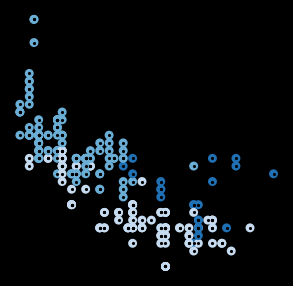

In [121]:
f, ax = plt.subplots(figsize=(5,5))

style = {'linewidths': 0, 'marker': 'o'} # some marker style props 

size_transform = lambda x: (x**2.5)*0.5 # scale the size so that it varies more drastically 

df_tmp = df
ax.scatter(
    df_tmp['displ'], df_tmp['hwy'], 
    **style, 
    s=(4**2)*5,
    c=df['drv'].astype('category').cat.codes, # color as a number 
    cmap='Blues', norm = mpl.colors.Normalize(vmin=-1, vmax=3) # choose and scale the colormap mapping to have nice colors 
    )
ax.scatter(
    df_tmp['displ'], df_tmp['hwy'], 
    **style, 
    s=(1**2)*10,
    c='k'
)


ax.axis('off')  # get rid of the axes 
f.patch.set_facecolor('black') # create black bg 

Let's plot it in polar coordinates: 

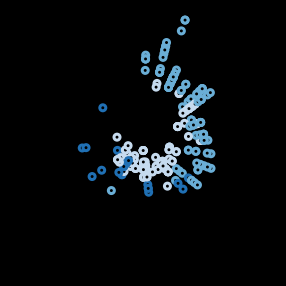

In [124]:
f, ax = plt.subplots(figsize=(5,5), 
                     subplot_kw={'projection': 'polar'} # we have to set projection upon creating the axes 
                    )

style = {'linewidths': 3, 'marker': 'o', } # some marker style props 

size_transform = lambda x: (x**2.5)*0.5 # scale the size so that it varies more drastically 

df_tmp = df
ax.scatter(
    df_tmp['displ'], 
    df_tmp['hwy'], 
    **style, 
    c='k',
    edgecolors=df['drv_cat'].apply(color_transform)
    )

# adapt the orientation and scaling to match the ggplot version 
ax.set_rmin(10) # a bit smaller than df_tmp['hwy'].min()
ax.set_theta_direction(-1) # go clockwise 
ax.set_theta_zero_location('W') # start with 0deg pointing to the 'west'

ax.axis('off')  # get rid of the axes 
f.patch.set_facecolor('black') # create black bg 


Interestingly, the conversion seems to work differently between mpl and ggplot -> notice the darkest series! In R, it seems the data make a full circle. A quick look into documentation tells us, that R does a conversion of x values into a (0, $2\pi$) range, while mpl interprets the data as they are. 

We create our own conversion of the data points explicitly to theta, so that we can reproduce the exact same visualization from the workshop. Then we adapt again the axes limits and location of theta_zero

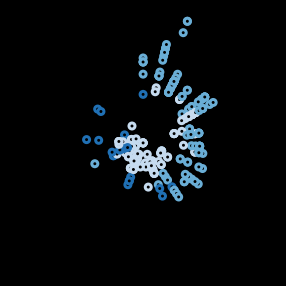

In [154]:
f, ax = plt.subplots(figsize=(5,5), 
                     subplot_kw={'projection': 'polar'} # we have to set projection upon creating the axes 
                    )

style = {'linewidths': 3, 'marker': 'o', } # some marker style props 

size_transform = lambda x: (x**2.5)*0.5 # scale the size so that it varies more drastically 

displ_to_theta = lambda x: (x-df_tmp['displ'].min()) / (df_tmp['displ'].max()-df_tmp['displ'].min()) * 2*np.pi

df_tmp = df
ax.scatter(
    df_tmp['displ'].apply(displ_to_theta), 
    df_tmp['hwy'], 
    **style, 
    c='k',
    edgecolors=df['drv_cat'].apply(color_transform)
    )

# adapt the orientation and scaling to match the ggplot version 
ax.set_rmin(df_tmp['hwy'].min())  
ax.set_theta_direction(-1) # go clockwise 
ax.set_theta_zero_location('N') # start with 0deg pointing to the 'north'

ax.axis('off')  # get rid of the axes 
f.patch.set_facecolor('black') # create black bg 
